In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Iris Dataset

In [2]:
iris = datasets.load_iris()
X = iris.data 
y = iris.target

In [3]:
y_labels = []

for i in y:
    if i == 0:
        y_labels.append([1,0,0])
    elif i == 1:
        y_labels.append([0,1,0])
    else:
        y_labels.append([0,0,1])
        
y = np.array(y_labels)

X = X/np.amax(X,axis=0) 
X = X/np.mean(X,axis=0) 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=1)

# Data

[]

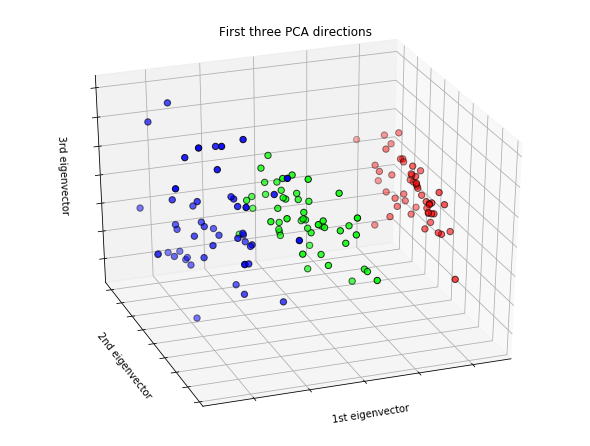

In [5]:
# code from sklearn documentation

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

# Hyper-parameters

In [6]:
LR = 0.01
iterations = 10000
np.random.seed(1)

# 4 inputs
# 5 hidden
# 3 outputs

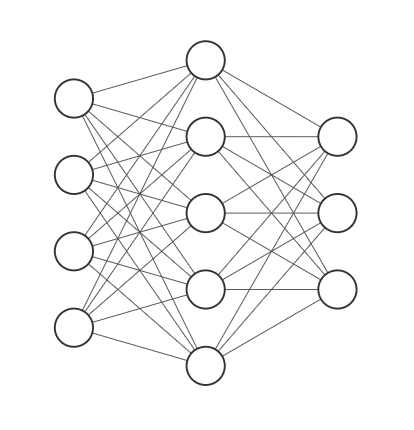

# Network

In [7]:
class Network():
    
    def __init__(self,X_train,y_train,X_test,y_test):
        
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        
        # Network Dimensions
        self.inSize = 4
        self.hidSize = 5
        self.outSize = 3
        
        # Initialize weights
        self.w1 = np.random.randn(self.inSize,self.hidSize)   
        self.w2 = np.random.randn(self.hidSize,self.outSize) 
            
        self.losses = []
        
    # Sigmoid Activation Function        
    def sigmoid(self,s):
        return 1/(1+np.exp(-s))
    
    # Derivative of Sigmoid (assumes sigmoid already calculated)
    def d_sigmoid(self,s):
        return s*(1-s)  
    
    # Step Activation Function
    def step(self,s):
        preds = []
    
        for row in s:
            highest_index = row.argmax()
            pred = np.zeros([3])
            pred[highest_index]=1
            preds.append(pred)
            
        preds = [[int(j)for j in i] for i in preds]
    
        return np.array(preds)
    

    # Foward Propagation
    def Forward(self,X):
        
        self.z1 = np.dot(X,self.w1)
        self.l2 = self.sigmoid(self.z1)  
        self.z2 = np.dot(self.l2,self.w2)
        self.l3 = self.sigmoid(self.z2)
        
        return self.l3
            
        
    # Back Propagation    
    def Back(self):
        
        self.loss = self.y_train-self.l3
        self.loss_l3 = self.loss*self.d_sigmoid(self.l3)
        self.loss_w2 = np.dot(self.l2.T,self.loss_l3)
        
        self.loss_z2 = np.dot(self.loss_l3,self.w2.T)
        self.loss_l2 = self.loss_z2*self.d_sigmoid(self.l2)
        self.loss_w1 = np.dot(self.X_train.T,self.loss_l2)
        
        self.w1 += LR*self.loss_w1
        self.w2 += LR*self.loss_w2

        
    # Train Network    
    def Train(self):
        
        for i in range(iterations):
            self.Forward(self.X_train)
            self.Back()  
            
            self.losses.append(np.mean(np.square(y_train-self.l3)))
              
                
    # Get Accuracy           
    def accuracy(self,X,y):
        
        preds = self.step(self.Forward(X)) 
        
        correct = 0
        for pred,label in zip(preds,y):
            if np.all(pred==label):
                correct +=1
            
        accuracy = correct/y.shape[0]
        
        print('Accuracy: {}%'.format(round(accuracy,4)*100))
        
    def Graph(self):
        plt.plot(self.losses)
        plt.xlabel('Iteration #')
        plt.ylabel('Loss')
        plt.title('Loss Graph')


In [8]:
network = Network(X_train,y_train,X_test,y_test)

In [9]:
network.Train()

In [10]:
network.accuracy(X_test,y_test) # Accuracy of Test Set

Accuracy: 100.0%


In [11]:
network.accuracy(X_train,y_train) # Accuracy of Train Set

Accuracy: 97.5%


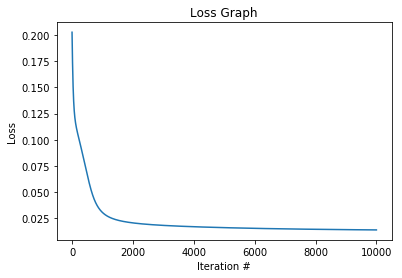

In [12]:
network.Graph()